In [1]:
! pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('all-mpnet-base-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
sentence=[
    "Saurabh Likes Saloni",
    "A boy from Uttarakhand whose name start with the word next to R adores a girl whose name also start with the same letter",
    "Saloni likes Saurabh"
]

In [9]:
embed=model.encode(sentence)
embed.shape

(3, 768)

In [12]:
from sentence_transformers.util import cos_sim
scores=cos_sim(embed[0],embed[1:])

In [13]:
scores

tensor([[0.3521, 0.9661]])

In [19]:
from transformers import DPRContextEncoderTokenizer, DPRContextEncoder, DPRQuestionEncoderTokenizer, DPRQuestionEncoder

In [20]:
ctx_model=DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
ctx_tokenizer=DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

ques_model=DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
ques_tokenizer=DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokeniz

In [26]:
questions=[
    "What is the name of the boy in love with saloni?",
    "Who is the greatest player of NBA?",
    "How many searches on google?"
]

contexts=[
    "Saurabh is in love with a girl",
    "The girl name is Saloni",
    "who is the greatest player of football?",
    "Sunil Chettri is a great player",
    "NBA Greatest player is Kobe Bryant",
    "Google has around 2 million querries every day",
    "how many searches in google?",
    "google is a popular search engine"
]

In [27]:
xb_tokens=ctx_tokenizer(contexts,max_length=256,padding='max_length',return_tensors='pt')
xb=ctx_model(**xb_tokens)

xq_tokens=ques_tokenizer(questions,max_length=256,padding='max_length',return_tensors='pt')
xq=ques_model(**xq_tokens)

In [28]:
xq.keys()

odict_keys(['pooler_output'])

In [24]:
xq.pooler_output.shape

torch.Size([3, 768])

In [29]:
import torch

for i,xq_vec in enumerate(xq.pooler_output):
  probs=cos_sim(xq_vec,xb.pooler_output)
  argmax=torch.argmax(probs)
  print(questions[i])
  print(contexts[argmax])
  print('----')

What is the name of the boy in love with saloni?
Saurabh is in love with a girl
----
Who is the greatest player of NBA?
NBA Greatest player is Kobe Bryant
----
How many searches on google?
Google has around 2 million querries every day
----


Vision Transformer

In [30]:
from transformers import CLIPProcessor, CLIPModel

In [31]:
model=CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor=CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [33]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np


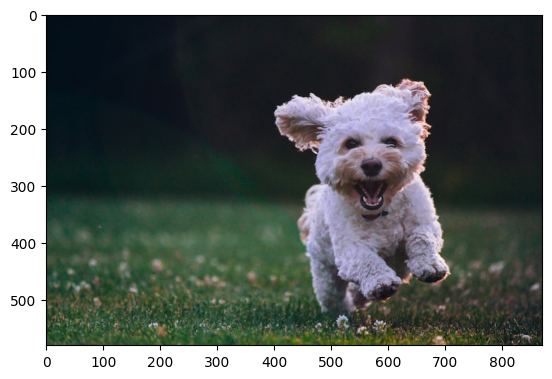

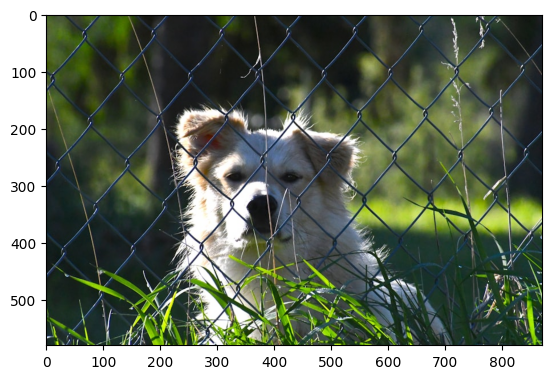

In [34]:
urls=[
    "https://images.unsplash.com/photo-1534361960057-19889db9621e?q=80&w=870&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
    ,"https://images.unsplash.com/photo-1604960613958-0c09638e9277?q=80&w=870&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
]
images=[Image.open(requests.get(url, stream=True).raw) for url in urls]

for image in images:
  plt.show(plt.imshow(np.asarray(image)))

In [35]:
captions=["a dog running",
          "Two dogs running",
          "Dog behind fence",
          "Trees in the park",
          "Angry dog"]

In [36]:
inputs=processor(
    text=captions,images=images,return_tensors='pt',padding=True
    )

In [37]:
inputs

{'input_ids': tensor([[49406,   320,  1929,  2761, 49407, 49407],
        [49406,  1237,  3255,  2761, 49407, 49407],
        [49406,  1929,  2403, 12679, 49407, 49407],
        [49406,  4682,   530,   518,  1452, 49407],
        [49406,  9054,  1929, 49407, 49407, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0]]), 'pixel_values': tensor([[[[-1.6755, -1.6755, -1.6755,  ..., -1.3835, -1.4565, -1.4711],
          [-1.6755, -1.6755, -1.6755,  ..., -1.4127, -1.4857, -1.4857],
          [-1.6755, -1.6755, -1.6755,  ..., -1.4273, -1.3981, -1.4273],
          ...,
          [-0.9310, -0.9893, -1.0331,  ..., -0.6828, -1.1061, -0.8872],
          [-0.9748, -1.0623, -1.0769,  ..., -0.7412, -0.9602, -0.8434],
          [-1.0477, -1.1791, -1.0915,  ..., -0.9602, -0.9748, -0.9602]],

         [[-1.4970, -1.4970, -1.4970,  ..., -1.3469, -1.3019, -1.3019],
          [-1.4970, -1.4970

In [38]:
outputs=model(**inputs)
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[30.6794, 27.9541, 23.7097, 16.9804, 23.1882],
        [24.8750, 22.2645, 31.0494, 17.5700, 24.5799]], grad_fn=<TBackward0>), logits_per_text=tensor([[30.6794, 24.8750],
        [27.9541, 22.2645],
        [23.7097, 31.0494],
        [16.9804, 17.5700],
        [23.1882, 24.5799]], grad_fn=<MulBackward0>), text_embeds=tensor([[-0.0021, -0.0179, -0.0378,  ..., -0.0335,  0.0086, -0.0112],
        [ 0.0117, -0.0137, -0.0734,  ..., -0.0049,  0.0094, -0.0250],
        [ 0.0030, -0.0122, -0.0531,  ...,  0.0124, -0.0243,  0.0647],
        [ 0.0033,  0.0463,  0.0084,  ..., -0.0199, -0.0736,  0.0331],
        [-0.0054,  0.0069, -0.0338,  ..., -0.0236,  0.0389, -0.0102]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[ 0.0132,  0.0069, -0.0136,  ...,  0.0248,  0.0194, -0.0348],
        [-0.0159,  0.0009, -0.0187,  ...,  0.0430, -0.0406,  0.0595]],
       grad_fn=<DivBackward0>), text_model_output=BaseModelOutputWithPooling(last_hidden_state=t

In [39]:
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [40]:
probs=outputs.logits_per_image.argmax(dim=1)

In [41]:
probs

tensor([0, 2])

a dog running


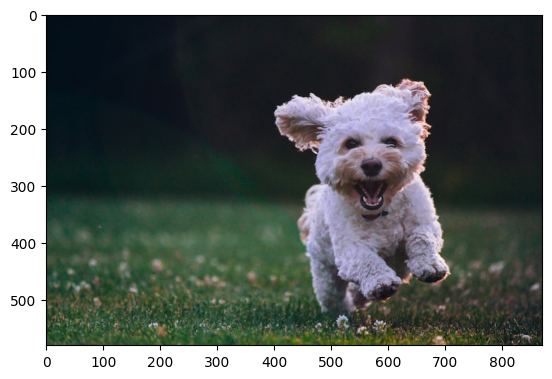

Dog behind fence


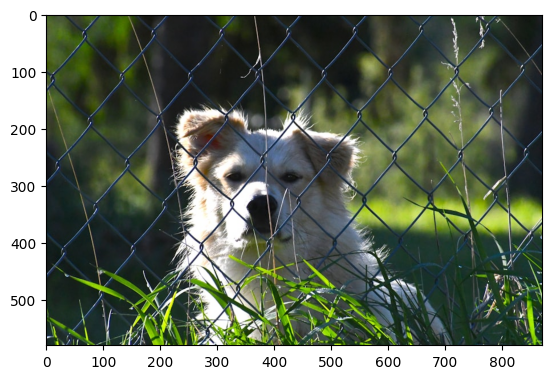

In [42]:
for i,image in enumerate(images):
  argmax=probs[i].item()
  print(captions[argmax])
  plt.show(plt.imshow(np.asarray(image)))